In [1]:
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames") 
Pkg.add("DynamicalSystems")
Pkg.add("CausalityTools")
Pkg.add("Plots")
Pkg.add("Statistics")
Pkg.add("LaTeXStrings")
Pkg.add("Interpolations")


 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Res

In [1]:
using CSV 
using DataFrames
using DynamicalSystems
using Statistics
using(LaTeXStrings)
using UncertainData, CausalityTools, Distributions, StatsBase, 
    Test, Interpolations, Plots

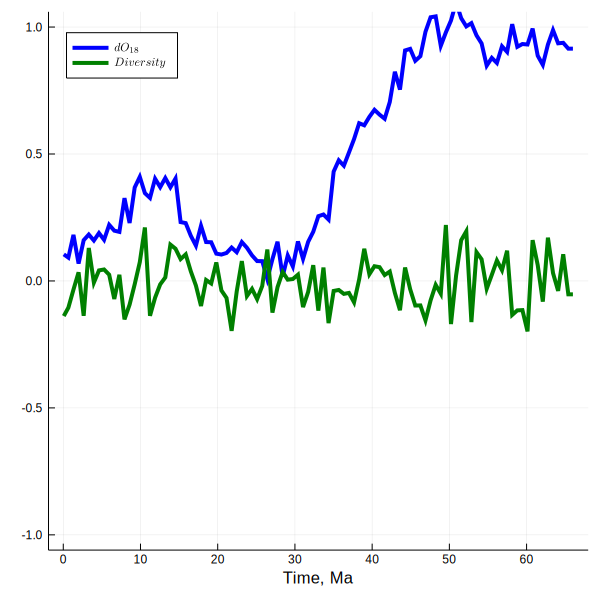

In [154]:
d = CSV.read("sim_Cenozoic.csv", DataFrame)

t = d[:,1]
cli = d[:,2]
div = d[:,3]
pl = plot(xlabel = "Time, Ma", ylabel = "",
    ylims = [-1, 1])
plot!(t, cli, label = L"dO_{18}", c = :blue, lw = 4)#;scatter!(t, cli, c = :red, label = "")
plot!(t, div, label = L"Diversity", c = :green, lw = 4)

plot(pl, layout = grid(1, 1), size = (600, 600), legend = :topleft)

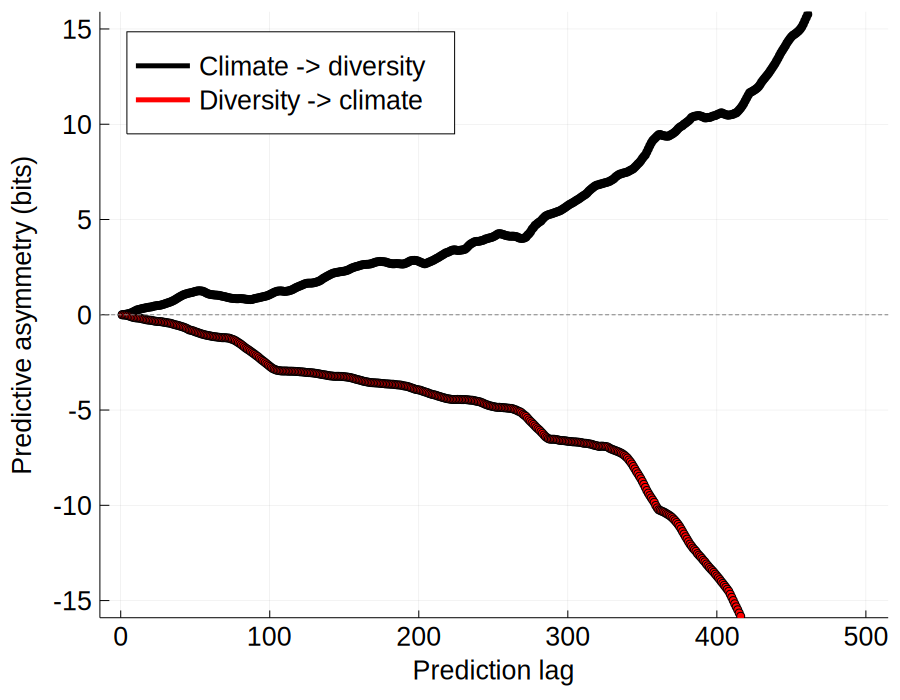

In [155]:
# Prediction lags
N = 250
ηs = 1:N
npts = N
binning = RectangularBinning(N)

# Use defaults, binning and prediction lags are required. 
# Note that `binning` and `ηs` are *mandatory* keyword arguments.
TransferOperatorGridTest(binning = binning, ηs = ηs)

# The other keywords can also be adjusted
TransferOperatorGridTest(k = 1, l = 2, binning = binning, ηs = ηs)

# Maximum prediction 
η_max = 500

# Embedding parameters (3-dimensional embedding)
k, l, m = 1, 1, 1

# Partition
n_subdivisions = floor(Int, npts^(1/(k + l + m + 1)))
bin_scheme = RectangularBinning(n_subdivisions)

#Transfer entropy test with base-2 logarithm, 
te_test = TransferOperatorGridTest(binning = bin_scheme, 
    ηs = -η_max:η_max, b = 2, k = k, l = l, m = m) 

# Predictive asymmetry test based on the transfer entropy test
test = PredictiveAsymmetryTest(predictive_test = te_test)
influence_cli_div = causality(cli, div, test)
influence_div_cli = causality(div, cli, test)
plot(size = (900, 700), 
    tickfont = font(18), guidefont = font(18), legendfont = font(18),  legend=:topleft,
    xlabel = "Prediction lag", ylabel = "Predictive asymmetry (bits)", ylims = [-15, 15]); 
plot!(1:η_max, influence_cli_div, c = :black, label = "Climate -> diversity", linewidth=5); scatter!(1:η_max, influence_cli_div, c = :black, label = "", linewidth=5); 
plot!(1:η_max, influence_div_cli, c = :red, label = "Diversity -> climate", linewidth=5); scatter!(1:η_max, influence_div_cli, c = :red, label = "", linewidth=5)
hline!([0], ls = :dash, lc = :grey, label = "")



┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[146]:3
└ @ Core In[146]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[146]:5
└ @ Core In[146]:5
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[146]:6
└ @ Core In[146]:6
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[146]:7
└ @ Core In[146]:7


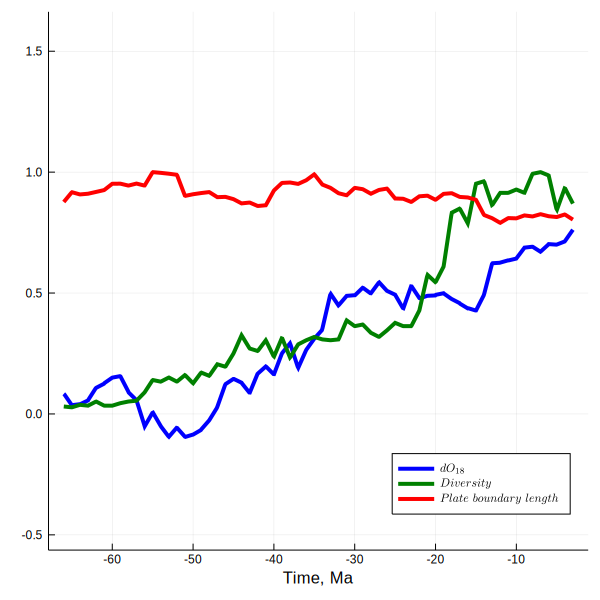

In [146]:

d = CSV.read("SQS_interp_plates.csv", DataFrame)
#Interpolated/binned in Julia
t = d["age"]
cli = d["cli"]
div = d["div"]
plates = d["plates"]
pl = plot(xlabel = "Time, Ma", ylabel = "",
    ylims = [-0.5, 1.6])
plot!(t, cli, label = L"dO_{18}", c = :blue, lw = 4)#;scatter!(t, cli, c = :red, label = "")
plot!(t, div, label = L"Diversity", c = :green, lw = 4)
plot!(t, plates, label = L"Plate\ boundary\ length", c = :red, lw = 4)
plot(pl, layout = grid(1, 1), size = (600, 600), legend = :bottomright)


In [149]:
# Prediction lags
ηs = 1:50
npts = 50
binning = RectangularBinning(24)

# Use defaults, binning and prediction lags are required. 
# Note that `binning` and `ηs` are *mandatory* keyword arguments.
TransferOperatorGridTest(binning = binning, ηs = ηs)

# The other keywords can also be adjusted
TransferOperatorGridTest(k = 1, l = 2, binning = binning, ηs = ηs)

# Maximum prediction 
η_max = 100

# Embedding parameters (3-dimensional embedding)
k, l, m = 1, 1, 1

# Partition
n_subdivisions = floor(Int, npts^(1/(k + l + m + 1)))
bin_scheme = RectangularBinning(n_subdivisions)

#Transfer entropy test with base-2 logarithm, 
te_test = TransferOperatorGridTest(binning = bin_scheme, 
    ηs = -η_max:η_max, b = 2, k = k, l = l, m = m) 

# Predictive asymmetry test based on the transfer entropy test
test = PredictiveAsymmetryTest(predictive_test = te_test)

influence_cli_div = causality(cli, div, test)
influence_div_cli = causality(div, cli, test)

influence_plates_div = causality(plates, div, test)
influence_plates_cli = causality(plates, cli, test)
plot(size = (900, 700), 
    tickfont = font(18), guidefont = font(18), legendfont = font(18),  legend=:bottomright,
    xlabel = "Prediction lag", ylabel = "Predictive asymmetry (bits)", ylims = [-1, 1]); 
plot!(1:η_max, influence_cli_div, c = :blue, label = "Climate -> diversity", linewidth=5); #scatter!(1:η_max, influence_cli_div, c = :black, label = "", linewidth=5); 
plot!(1:η_max, influence_div_cli, c = :green, label = "Diversity -> climate", linewidth=5); #scatter!(1:η_max, influence_div_cli, c = :red, label = "", linewidth=5)

plot!(1:η_max, influence_plates_div, c = :orange, label = "Plates -> diversity", linewidth=5); #scatter!(1:η_max, influence_div_cli, c = :red, label = "", linewidth=5)
plot!(1:η_max, influence_plates_cli, c = :black, label = "Plates -> climate", linewidth=5); #scatter!(1:η_max, influence_div_cli, c = :red, label = "", linewidth=5)
hline!([0], ls = :dash, lc = :grey, label = "")
png("Causality_SQS_stg_plates")


┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[4]:3
└ @ Core In[4]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[4]:5
└ @ Core In[4]:5
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[4]:6
└ @ Core In[4]:6


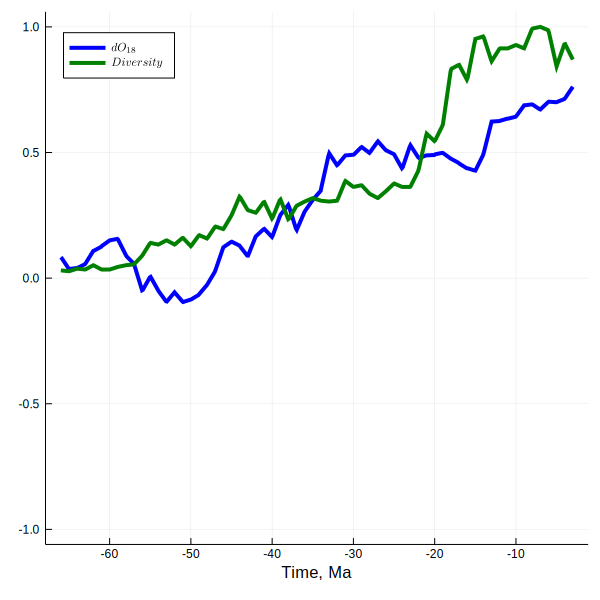

In [4]:

SQS_d = CSV.read("SQS_interp.csv", DataFrame)
#Interpolated/binned in Julia
t = SQS_d["age"]
cli = SQS_d["cli"]
div = SQS_d["div"]
pl = plot(xlabel = "Time, Ma", ylabel = "",
    ylims = [-1, 1])
plot!(t, cli, label = L"dO_{18}", c = :blue, lw = 4)#;scatter!(t, cli, c = :red, label = "")
plot!(t, div, label = L"Diversity", c = :green, lw = 4)

plot(pl, layout = grid(1, 1), size = (600, 600), legend = :topleft)


In [5]:
# Prediction lags
ηs = 1:20
npts = 20
binning = RectangularBinning(20)

# Use defaults, binning and prediction lags are required. 
# Note that `binning` and `ηs` are *mandatory* keyword arguments.
TransferOperatorGridTest(binning = binning, ηs = ηs)

# The other keywords can also be adjusted
TransferOperatorGridTest(k = 1, l = 2, binning = binning, ηs = ηs)

# Maximum prediction 
η_max = 40

# Embedding parameters (3-dimensional embedding)
k, l, m = 1, 1, 1

# Partition
n_subdivisions = floor(Int, npts^(1/(k + l + m + 1)))
bin_scheme = RectangularBinning(n_subdivisions)

#Transfer entropy test with base-2 logarithm, 
te_test = TransferOperatorGridTest(binning = bin_scheme, 
    ηs = -η_max:η_max, b = 2, k = k, l = l, m = m) 

# Predictive asymmetry test based on the transfer entropy test
test = PredictiveAsymmetryTest(predictive_test = te_test)


PredictiveAsymmetryTest{TransferOperatorGridTest{81},40}(predictive_test = TransferOperatorGridTest{81}(k = 1, l = 1, m = 1, n = 1, τ = 1, b = 2, estimator = TransferOperatorGrid(), binning_summary_statistic = mean, binning = RectangularBinning(2), ηs = -40:40))

In [6]:
influence_cli_div = causality(cli, div, test)
influence_div_cli = causality(div, cli, test)
plot(size = (900, 700), 
    tickfont = font(18), guidefont = font(18), legendfont = font(18),  legend=:topleft,
    xlabel = "Prediction lag", ylabel = "Predictive asymmetry (bits)", ylims = [-1, 1]); 
plot!(1:η_max, influence_cli_div, c = :black, label = "Climate -> diversity", linewidth=5); scatter!(1:η_max, influence_cli_div, c = :black, label = "", linewidth=5); 
plot!(1:η_max, influence_div_cli, c = :red, label = "Diversity -> climate", linewidth=5); scatter!(1:η_max, influence_div_cli, c = :red, label = "", linewidth=5)
hline!([0], ls = :dash, lc = :grey, label = "")
png("Causality_SQS_stg")


In [7]:
influence_cli_div = causality(cli, div, test)
influence_div_cli = causality(div, cli, test)
plot(size = (900, 700), 
    tickfont = font(12), guidefont = font(12), legendfont = font(12),  
    xlabel = "Prediction lag", ylabel = "Predictive asymmetry (bits)", ylims = [-1, 1]); 
plot!(1:η_max, influence_cli_div, c = :black, label = "cli -> div"); scatter!(1:η_max, influence_cli_div, c = :black, label = ""); 
plot!(1:η_max, influence_div_cli, c = :red, label = "div -> cli"); scatter!(1:η_max, influence_div_cli, c = :red, label = "")
hline!([0], ls = :dash, lc = :grey, label = "")
png("Causality_cli_div_1Myr")


In [9]:

b = CSV.read("pred_interp.csv", DataFrame) #Herbivore - carnivore dynamics
#TODO: Interpolated/binned in Julia
t = b["age"]
cli = b["smoothed"]
herb = b["herb_div"]
pred = b["pred_div"]
pl = plot(xlabel = "Time, Ma", ylabel = "",
    ylims = [-0.2, 1])
plot!(t, cli, label = L"dO_{18}", c = :blue, lw = 4)
plot!(t, herb, label = L"Herbivore\ diversity", c = :green, lw = 4)
plot!(t, pred, label = L"Predator\ diversity", c = :red, lw = 4)
plot(pl, layout = grid(1, 1), size = (600, 600), legend = :topleft)
png("herb_carn_div_cli")


┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[9]:3
└ @ Core In[9]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[9]:5
└ @ Core In[9]:5
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[9]:6
└ @ Core In[9]:6
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[9]:7
└ @ Core In[9]:7


In [11]:


pa_pred = causality(b["pred_div"], b["herb_div"], test)
pa_herb = causality(b["herb_div"], b["pred_div"], test)
pa_cli_herb = causality(b["smoothed"], b["herb_div"], test)
pa_cli_pred = causality(b["smoothed"], b["pred_div"], test)


p_xy = plot(xlabel = "Prediction lag, Ma", ylabel = L"\mathbb{A} (bits)",
    ylims = [-1, 1])
#plot!(1:maximum(ηs), pa_hl, label = L"Hare \to Lynx", c = :green, lw = 4)
#plot!(1:maximum(ηs), pa_lh, label = L"Lynx \to Hare", c = :red, lw = 4)
#plot!(1:maximum(ηs), pa_ph, label = L"Precip. \to Hare", c = :blue, lw = 4)
plot!(1:η_max, pa_pred, label = L"Pred. \to herbiv.", c = :red, lw = 4)
plot!(1:η_max, pa_herb, label = L"Herbiv. \to pred.", c = :green, lw = 4)
plot!(1:η_max, pa_cli_herb, label = L"Climate. \to herb.", c = :blue, lw = 4)
plot!(1:η_max, pa_cli_pred, label = L"Climate. \to pred.", c = :orange, lw = 4)
hline!([0], lw = 2, ls = :dot, α = 0.5, c = :black, label = "")

#p_yz = plot(xlabel = "Prediction lag", ylabel = L"\mathbb{A} (bits)",
#    ylims = [-0.8, 0.8])
#plot!(1:maximum(ηs), pa_O_RR, label = L"y \to z", c = :red)
#plot!(1:maximum(ηs), pa_RR_O, label = L"z \to y", c = :blue)
#hline!([0], lw = 2, ls = :dot, α = 0.5, c = :black, label = "")


plot(p_xy, layout = grid(1, 1), size = (600, 600), legend = :topleft)

png("pred_herb_causality")



┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[11]:1
└ @ Core In[11]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[11]:1
└ @ Core In[11]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[11]:4
└ @ Core In[11]:4
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[11]:4
└ @ Core In[11]:4
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[11]:5
└ @ Core In[11]:5
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[11]:5
└ @ Core In[11]:5
┌ Warning: `getindex(d

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[12]:3
└ @ Core In[12]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[12]:5
└ @ Core In[12]:5
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[12]:6
└ @ Core In[12]:6


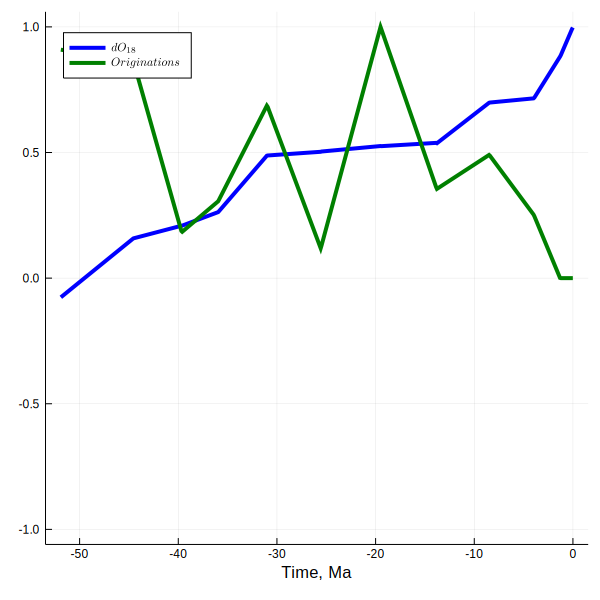

In [12]:

SQS_d = CSV.read("orig_interp.csv", DataFrame)
#Interpolated/binned in Julia
t = SQS_d["age"]
cli = SQS_d["smoothed"]
div = SQS_d["div"]
pl = plot(xlabel = "Time, Ma", ylabel = "",
    ylims = [-1, 1])
plot!(t, cli, label = L"dO_{18}", c = :blue, lw = 4)#;scatter!(t, cli, c = :red, label = "")
plot!(t, div, label = L"Originations", c = :green, lw = 4)

plot(pl, layout = grid(1, 1), size = (600, 600), legend = :topleft)


In [13]:
influence_cli_div = causality(cli, div, test)
influence_div_cli = causality(div, cli, test)
plot(size = (900, 700), 
    tickfont = font(12), guidefont = font(12), legendfont = font(12), 
    xlabel = "Prediction lag", ylabel = "Predictive asymmetry (bits)", ylims = [-1, 1]); 
plot!(1:η_max, influence_cli_div, c = :black, label = "cli -> div"); scatter!(1:η_max, influence_cli_div, c = :black, label = ""); 
plot!(1:η_max, influence_div_cli, c = :red, label = "div -> cli"); scatter!(1:η_max, influence_div_cli, c = :red, label = "")
hline!([0], ls = :dash, lc = :grey, label = "")
png("Causality_orig_stg")


In [29]:
ecol_d = CSV.read("ecol.csv", DataFrame)
influence_HL = causality(ecol_d["Hare"], ecol_d["Lynx"], test)
influence_LH = causality(ecol_d["Lynx"], ecol_d["Hare"], test)
plot(size = (900, 700), 
    tickfont = font(18), guidefont = font(18), legendfont = font(18), legend=:topleft,
    xlabel = "Prediction lag", ylabel = "Predictive asymmetry (bits)", ylims = [-1, 1]); 
plot!(1:η_max, influence_HL, c = :green, label = "Hare -> Lynx", linewidth=5); scatter!(1:η_max, influence_HL, c = :black, label = ""); 
plot!(1:η_max, influence_LH, c = :red, label = "Lynx -> Hare", linewidth=5); scatter!(1:η_max, influence_LH, c = :red, label = "")
hline!([0], ls = :dash, lc = :grey, label = "")
png("Lynxes_hares_causality")

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[29]:2
└ @ Core In[29]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[29]:2
└ @ Core In[29]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[29]:3
└ @ Core In[29]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[29]:3
└ @ Core In[29]:3
